In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report, ConfusionMatrixDisplay, accuracy_score, recall_score, confusion_matrix

In [2]:
df = pd.read_csv("Epileptic Seizure Recognition.csv")
df

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,X22.V1.114,-22,-22,-23,-26,-36,-42,-45,-42,-45,...,15,16,12,5,-1,-18,-37,-47,-48,2
11496,X19.V1.354,-47,-11,28,77,141,211,246,240,193,...,-65,-33,-7,14,27,48,77,117,170,1
11497,X8.V1.28,14,6,-13,-16,10,26,27,-9,4,...,-65,-48,-61,-62,-67,-30,-2,-1,-8,5
11498,X10.V1.932,-40,-25,-9,-12,-2,12,7,19,22,...,121,135,148,143,116,86,68,59,55,3


In [3]:
df = df.drop('Unnamed', axis=1)
df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,135,190,229,223,192,125,55,-9,-33,-38,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,386,382,356,331,320,315,307,272,244,232,...,164,150,146,152,157,156,154,143,129,1
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,4,2,-12,-32,-41,-65,-83,-89,-73,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,-22,-22,-23,-26,-36,-42,-45,-42,-45,-49,...,15,16,12,5,-1,-18,-37,-47,-48,2
11496,-47,-11,28,77,141,211,246,240,193,136,...,-65,-33,-7,14,27,48,77,117,170,1
11497,14,6,-13,-16,10,26,27,-9,4,14,...,-65,-48,-61,-62,-67,-30,-2,-1,-8,5
11498,-40,-25,-9,-12,-2,12,7,19,22,29,...,121,135,148,143,116,86,68,59,55,3


In [4]:
df['y'] = df['y'].apply(lambda x: 1 if x == 1 else 0)

In [5]:
df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,135,190,229,223,192,125,55,-9,-33,-38,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,0
1,386,382,356,331,320,315,307,272,244,232,...,164,150,146,152,157,156,154,143,129,1
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,57,64,48,19,-12,-30,-35,-35,-36,0
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,0
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,4,2,-12,-32,-41,-65,-83,-89,-73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,-22,-22,-23,-26,-36,-42,-45,-42,-45,-49,...,15,16,12,5,-1,-18,-37,-47,-48,0
11496,-47,-11,28,77,141,211,246,240,193,136,...,-65,-33,-7,14,27,48,77,117,170,1
11497,14,6,-13,-16,10,26,27,-9,4,14,...,-65,-48,-61,-62,-67,-30,-2,-1,-8,0
11498,-40,-25,-9,-12,-2,12,7,19,22,29,...,121,135,148,143,116,86,68,59,55,0


In [6]:
df.isna().sum().unique() # NO NULL VALUES

array([0], dtype=int64)

In [7]:
scaler = StandardScaler()

In [8]:
X_scaled = scaler.fit_transform(df.drop('y', axis=1))
X_scaled

array([[ 0.88505134,  1.20992878,  1.46276429, ..., -0.63414367,
        -0.43329036, -0.23539922],
       [ 2.40057718,  2.36619038,  2.23944096, ...,  1.02342937,
         0.95424076,  0.85653664],
       [-0.12328657, -0.16915405, -0.22513147, ..., -0.13687176,
        -0.13859348, -0.14440456],
       ...,
       [ 0.1544592 ,  0.10184476, -0.01720228, ...,  0.0657205 ,
         0.07015014,  0.02545213],
       [-0.17159018, -0.08484331,  0.00725997, ...,  0.49546166,
         0.43852123,  0.40762968],
       [ 0.24502848,  0.31262161,  0.41088722, ...,  0.0657205 ,
         0.08856869,  0.19530882]])

In [9]:
df = pd.DataFrame(
    data=X_scaled,
    columns=df.columns[:-1]
).join(df['y'])

df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,0.885051,1.209929,1.462764,1.439539,1.242366,0.818262,0.380910,-0.014267,-0.163196,-0.198415,...,-0.041630,-0.020282,-0.107131,-0.375743,-0.535944,-0.693858,-0.634144,-0.433290,-0.235399,0
1,2.400577,2.366190,2.239441,2.109257,2.037441,1.996033,1.941660,1.719102,1.546403,1.484569,...,1.057700,0.972841,0.943023,0.982911,1.018615,1.029295,1.023429,0.954241,0.856537,1
2,-0.123287,-0.169154,-0.225131,-0.172743,-0.149016,-0.179743,-0.312756,-0.409056,-0.484131,-0.547478,...,0.407820,0.455214,0.361582,0.193824,0.008151,-0.103237,-0.136872,-0.138593,-0.144405,0
3,-0.564057,-0.542530,-0.524794,-0.513803,-0.503073,-0.545472,-0.591462,-0.575607,-0.496475,-0.453979,...,-0.436417,-0.417531,-0.397851,-0.375743,-0.428321,-0.389414,-0.364021,-0.347337,-0.320328,0
4,0.015586,-0.325731,-0.537025,-0.575814,-0.434746,-0.254129,-0.058825,0.041250,-0.089134,-0.329314,...,0.085916,0.082040,0.005598,-0.108758,-0.165242,-0.316347,-0.431551,-0.470127,-0.368858,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,-0.062907,-0.066777,-0.078358,-0.104531,-0.173862,-0.216936,-0.238435,-0.217830,-0.237258,-0.266981,...,0.152726,0.166305,0.147991,0.110762,0.073921,-0.030170,-0.149150,-0.212268,-0.217200,0
11496,-0.213856,-0.000533,0.233536,0.534181,0.925578,1.351359,1.563860,1.521707,1.231639,0.886175,...,-0.333165,-0.128622,0.035263,0.164159,0.241335,0.371696,0.550714,0.794613,1.105255,1
11497,0.154459,0.101845,-0.017202,-0.042521,0.111868,0.204582,0.207494,-0.014267,0.065162,0.125715,...,-0.333165,-0.218906,-0.285123,-0.286748,-0.320698,-0.103237,0.065721,0.070150,0.025452,0
11498,-0.171590,-0.084843,0.007260,-0.017716,0.037330,0.117799,0.083625,0.158453,0.176255,0.219214,...,0.796533,0.882557,0.954889,0.929514,0.773473,0.603073,0.495462,0.438521,0.407630,0


In [10]:
pca = PCA(n_components=178)

In [11]:
pca.fit(X=X_scaled)

PCA(n_components=178)

In [12]:
var = pca.explained_variance_ratio_
var

array([5.60840176e-02, 5.23961501e-02, 4.96463262e-02, 4.82596139e-02,
       4.40524247e-02, 4.14681768e-02, 4.05466019e-02, 3.89763051e-02,
       3.66344906e-02, 3.40615848e-02, 3.30409984e-02, 3.28344183e-02,
       2.95671060e-02, 2.93203747e-02, 2.55929027e-02, 2.35621804e-02,
       2.13575732e-02, 2.07700069e-02, 2.01384140e-02, 1.96481747e-02,
       1.92267173e-02, 1.81558338e-02, 1.77582795e-02, 1.72403099e-02,
       1.62715113e-02, 1.62380825e-02, 1.51789730e-02, 1.47248124e-02,
       1.44063678e-02, 1.38623538e-02, 1.35808959e-02, 1.30400525e-02,
       1.25430663e-02, 1.14261865e-02, 1.09241937e-02, 9.59806063e-03,
       8.04752261e-03, 6.75482884e-03, 6.31933342e-03, 5.47122337e-03,
       4.76915147e-03, 4.34071339e-03, 3.77639019e-03, 3.09556157e-03,
       2.60402655e-03, 2.30469979e-03, 2.13078981e-03, 1.79483404e-03,
       1.74097338e-03, 1.52097381e-03, 1.16977541e-03, 1.11462688e-03,
       9.63730848e-04, 8.96416995e-04, 8.20300344e-04, 7.41137579e-04,
      

In [13]:
var.shape

(178,)

In [14]:
plt.figure(figsize=(20, 20), dpi=800)

sns.barplot(x=np.arange(1, 179), y=var)

plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

In [15]:
plt.figure(figsize=(20, 20), dpi=800)

sns.barplot(x=np.arange(80, 179), y=var[79:])

plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

In [16]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('y', axis=1), df['y'], train_size=0.3, random_state=42)

# Check the first 20 columns starting from 1

In [17]:
data = {}

for i in range(1, 21):

    data_n = {}

    for n in range(1, 18):

        model = KNeighborsClassifier(n_neighbors=n, n_jobs=-1)

        model.fit(X_train.iloc[:, :i], y_train)

        y_pred = model.predict(X_test.iloc[:, :i])

        acc = accuracy_score(y_pred=y_pred, y_true=y_test)
        error = np.mean(y_test != y_pred)
        f1 = f1_score(y_pred=y_pred, y_true=y_test)

        data_n[n] = {'acc': acc, 'error': error, 'f1':f1}

    data[i] = data_n


In [18]:
data

{1: {1: {'acc': 0.8127950310559007,
   'error': 0.18720496894409938,
   'f1': 0.551888195063931},
  2: {'acc': 0.8763975155279503,
   'error': 0.12360248447204969,
   'f1': 0.6021591363454619},
  3: {'acc': 0.8720496894409938,
   'error': 0.12795031055900621,
   'f1': 0.6383426966292136},
  4: {'acc': 0.8812422360248447,
   'error': 0.11875776397515528,
   'f1': 0.6288819875776398},
  5: {'acc': 0.8704347826086957,
   'error': 0.12956521739130436,
   'f1': 0.6323581247796969},
  6: {'acc': 0.8837267080745341,
   'error': 0.11627329192546584,
   'f1': 0.6408288564850346},
  7: {'acc': 0.8781366459627329,
   'error': 0.12186335403726709,
   'f1': 0.6439201451905625},
  8: {'acc': 0.8843478260869565,
   'error': 0.11565217391304349,
   'f1': 0.6439770554493307},
  9: {'acc': 0.8781366459627329,
   'error': 0.12186335403726709,
   'f1': 0.6502673796791444},
  10: {'acc': 0.8849689440993789,
   'error': 0.11503105590062111,
   'f1': 0.6508295625942685},
  11: {'acc': 0.884472049689441,
   '

In [19]:
acc = {}
err = {}
f1 = {}

for i in data.keys():
    for n in data[i].keys():
        acc[f'{i}-{n}'] = data[i][n]['acc']
        err[f'{i}-{n}'] = data[i][n]['error']
        f1[f'{i}-{n}'] = data[i][n]['f1']

In [20]:
print('----------------------')
for key, value in acc.items():
    if value == max(list(acc.values())):
        print(f"first {key.split('-')[0]} PC at n_neighbors = {key.split('-')[1]} -> Accuracy: {value*100}")

print('----------------------')
for key, value in err.items():
    if value == min(list(err.values())):
        print(f"first {key.split('-')[0]} PC at n_neighbors = {key.split('-')[1]} -> Error Rate: {value}")

print('----------------------')
for key, value in f1.items():
    if value == max(list(f1.values())):
        print(f"first {key.split('-')[0]} PC at n_neighbors = {key.split('-')[1]} -> F1 - Score: {value*100}")

print('----------------------')

----------------------
first 19 PC at n_neighbors = 5 -> Accuracy: 92.99378881987577
----------------------
first 19 PC at n_neighbors = 5 -> Error Rate: 0.07006211180124224
----------------------
first 19 PC at n_neighbors = 5 -> F1 - Score: 79.74137931034483
----------------------


### When checking the first 20 columns, when we take the first 19 columns at n_neighbors=5, we get the maximum f1-score and accuracy

# Take the first 4 columns and find the best n_neighbors value

In [21]:
result_acc = [0]
result_err = [0]
result_f1 = [0]

for n in range(1, 31):

    model = KNeighborsClassifier(n_neighbors=n, n_jobs=-1)

    model.fit(X_train.iloc[:, :4], y_train)

    y_pred = model.predict(X_test.iloc[:, :4])

    acc = accuracy_score(y_pred=y_pred, y_true=y_test)
    err = np.mean(y_pred != y_test)
    f1 = f1_score(y_pred=y_pred, y_true=y_test)

    result_acc.append(acc)
    result_err.append(err)
    result_f1.append(f1)


In [22]:
print(result_acc)
print(result_err)
print(result_f1)

[0, 0.8683229813664596, 0.8946583850931678, 0.8941614906832298, 0.9, 0.902111801242236, 0.900248447204969, 0.904472049689441, 0.9049689440993789, 0.9052173913043479, 0.9062111801242236, 0.9080745341614906, 0.906583850931677, 0.9075776397515528, 0.9059627329192547, 0.9064596273291925, 0.9050931677018633, 0.9069565217391304, 0.9060869565217391, 0.9063354037267081, 0.9057142857142857, 0.9060869565217391, 0.9053416149068323, 0.9059627329192547, 0.9059627329192547, 0.9059627329192547, 0.9054658385093167, 0.9050931677018633, 0.9049689440993789, 0.9052173913043479, 0.9045962732919255]
[0, 0.13167701863354037, 0.1053416149068323, 0.10583850931677019, 0.1, 0.09788819875776397, 0.09975155279503106, 0.09552795031055901, 0.09503105590062112, 0.09478260869565218, 0.09378881987577639, 0.09192546583850932, 0.09341614906832298, 0.0924223602484472, 0.09403726708074533, 0.09354037267080745, 0.09490683229813665, 0.09304347826086956, 0.09391304347826086, 0.09366459627329192, 0.09428571428571429, 0.0939130

In [23]:
print(f"Max Accuracy at n_neighbors = {result_acc.index(max(result_acc))}: {max(result_acc)*100}")
print(f"Min Error Rate at n_neighbors = {result_err.index(min(result_err[1:]))}: {min(result_err[1:])}")
print(f"Max F1 Score at n_neighbors = {result_f1.index(max(result_f1))}: {max(result_f1)*100}")

Max Accuracy at n_neighbors = 11: 90.80745341614906
Min Error Rate at n_neighbors = 11: 0.09192546583850932
Max F1 Score at n_neighbors = 11: 73.24656543745482


### Best n_neighbors=11 for the first 4 columns

# Display the important details for it

Accuracy: 90.80745341614906
Error Rate: 0.09192546583850932
F1 Score: 73.24656543745482
Recall: 64.23589093214966
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94      6473
           1       0.85      0.64      0.73      1577

    accuracy                           0.91      8050
   macro avg       0.88      0.81      0.84      8050
weighted avg       0.90      0.91      0.90      8050



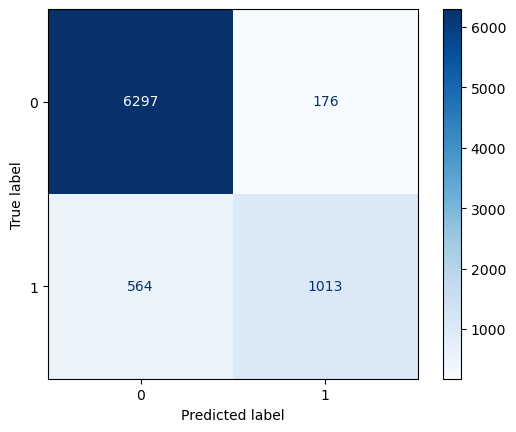

In [24]:
model = KNeighborsClassifier(n_neighbors=11, n_jobs=-1)

model.fit(X_train.iloc[:, :4], y_train)

y_pred = model.predict(X_test.iloc[:, :4])

print(f'Accuracy: {accuracy_score(y_pred=y_pred, y_true=y_test)*100}')
print(f'Error Rate: {np.mean(y_pred != y_test)}')
print(f'F1 Score: {f1_score(y_pred=y_pred, y_true=y_test)*100}')
print(f'Recall: {recall_score(y_pred=y_pred, y_true=y_test)*100}')
print(f'Classification Report:\n {classification_report(y_pred=y_pred, y_true=y_test)}')
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Use PCA to get the best 4 columns

In [25]:
pca = PCA(n_components=4)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Find the best n_neighbors values for it

In [26]:
result_acc = [0]
result_err = [0]
result_f1 = [0]

for n in range(1, 31):

    model = KNeighborsClassifier(n_neighbors=n, n_jobs=-1)

    model.fit(X_train_pca, y_train)

    y_pred = model.predict(X_test_pca)

    acc = accuracy_score(y_pred=y_pred, y_true=y_test)
    err = np.mean(y_pred != y_test)
    f1 = f1_score(y_pred=y_pred, y_true=y_test)

    result_acc.append(acc)
    result_err.append(err)
    result_f1.append(f1)

print(f"Max Accuracy at n_neighbors = {result_acc.index(max(result_acc))}: {max(result_acc)*100}")
print(f"Min Error Rate at n_neighbors = {result_err.index(min(result_err[1:]))}: {min(result_err[1:])}")
print(f"Max F1 Score at n_neighbors = {result_f1.index(max(result_f1))}: {max(result_f1)*100}")

Max Accuracy at n_neighbors = 9: 95.51552795031057
Min Error Rate at n_neighbors = 9: 0.04484472049689441
Max F1 Score at n_neighbors = 5: 87.88487282463186


### Best n_neighbors value is 9

# Display the important details for it

Accuracy: 95.51552795031057
Error Rate: 0.04484472049689441
F1 Score: 87.77514392143583
Recall: 82.18135700697526
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      6473
           1       0.94      0.82      0.88      1577

    accuracy                           0.96      8050
   macro avg       0.95      0.90      0.93      8050
weighted avg       0.95      0.96      0.95      8050



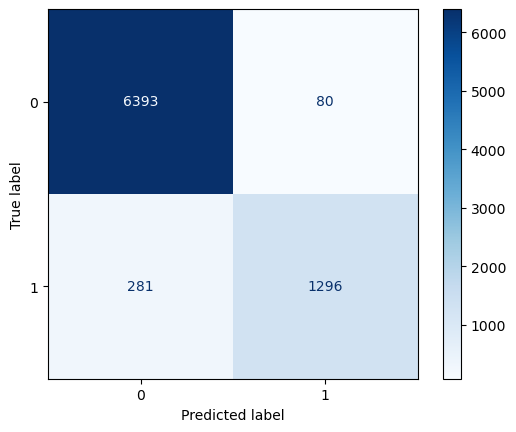

In [27]:
model = KNeighborsClassifier(n_neighbors=9, n_jobs=-1)

model.fit(X_train_pca, y_train)

y_pred = model.predict(X_test_pca)

print(f'Accuracy: {accuracy_score(y_pred=y_pred, y_true=y_test)*100}')
print(f'Error Rate: {np.mean(y_pred != y_test)}')
print(f'F1 Score: {f1_score(y_pred=y_pred, y_true=y_test)*100}')
print(f'Recall: {recall_score(y_pred=y_pred, y_true=y_test)*100}')
print(f'Classification Report:\n {classification_report(y_pred=y_pred, y_true=y_test)}')
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()